In [10]:
!pip install pandas
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.3 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [8]:
### Step 1: Introduction
# Retail Sales Performance Dashboard
# This project analyzes retail sales data, identifying key trends, top-selling products,
# and seasonal sales variations to provide business insights.

In [11]:
### Step 2: Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
### Step 3: Loading the Dataset

# Load the data file

file_path = 'Warehouse_and_Retail_Sales.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Preview the first few rows
print("\nPreview of Data:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB

Preview of Data:
   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020 

In [15]:
### Step 4: Data Cleaning

#### 4.1 Checking for Missing Values

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

#### 4.2 Handling Missing Values

# Fill missing numerical values with 0, and categorical with 'Unknown'
df.fillna({'SUPPLIER': 'Unknown', 'ITEM TYPE': 'Unknown', 'RETAIL SALES': 0}, inplace=True)

# Verify if missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values in Each Column:
YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

Missing Values After Handling:
YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64


In [16]:
#### 4.3 Checking for Duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

#### 4.4 Removing Duplicates

# Remove duplicate rows if any

df.drop_duplicates(inplace=True)
print("Duplicates removed. Remaining rows:", len(df))



Number of Duplicate Rows: 0
Duplicates removed. Remaining rows: 307645


In [17]:
### Step 5: Exploratory Data Analysis (EDA)

#### 5.1 Summary Statistics

print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                YEAR          MONTH   RETAIL SALES  RETAIL TRANSFERS  \
count  307645.000000  307645.000000  307645.000000     307645.000000   
mean     2018.438525       6.423862       7.024003          6.936465   
std         1.083061       3.461812      30.986095         30.237195   
min      2017.000000       1.000000      -6.490000        -38.490000   
25%      2017.000000       3.000000       0.000000          0.000000   
50%      2019.000000       7.000000       0.320000          0.000000   
75%      2019.000000       9.000000       3.260000          3.000000   
max      2020.000000      12.000000    2739.000000       1990.830000   

       WAREHOUSE SALES  
count    307645.000000  
mean         25.294597  
std         249.916798  
min       -7800.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max       18317.000000  


<Figure size 1200x600 with 0 Axes>

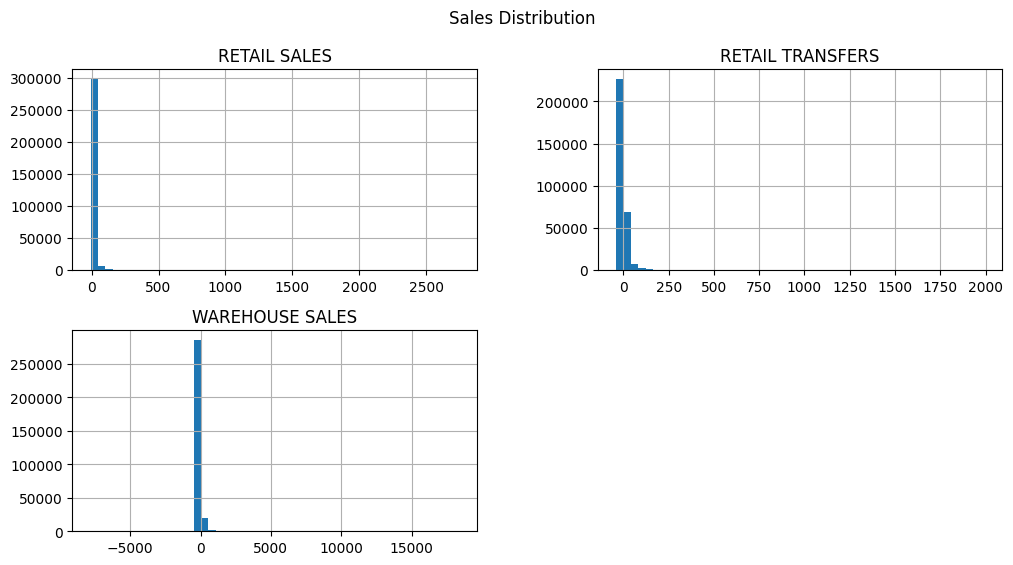

In [18]:
#### 5.2 Checking the Distribution of Sales

plt.figure(figsize=(12,6))
df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].hist(bins=50, figsize=(12,6))
plt.suptitle('Sales Distribution')
plt.show()

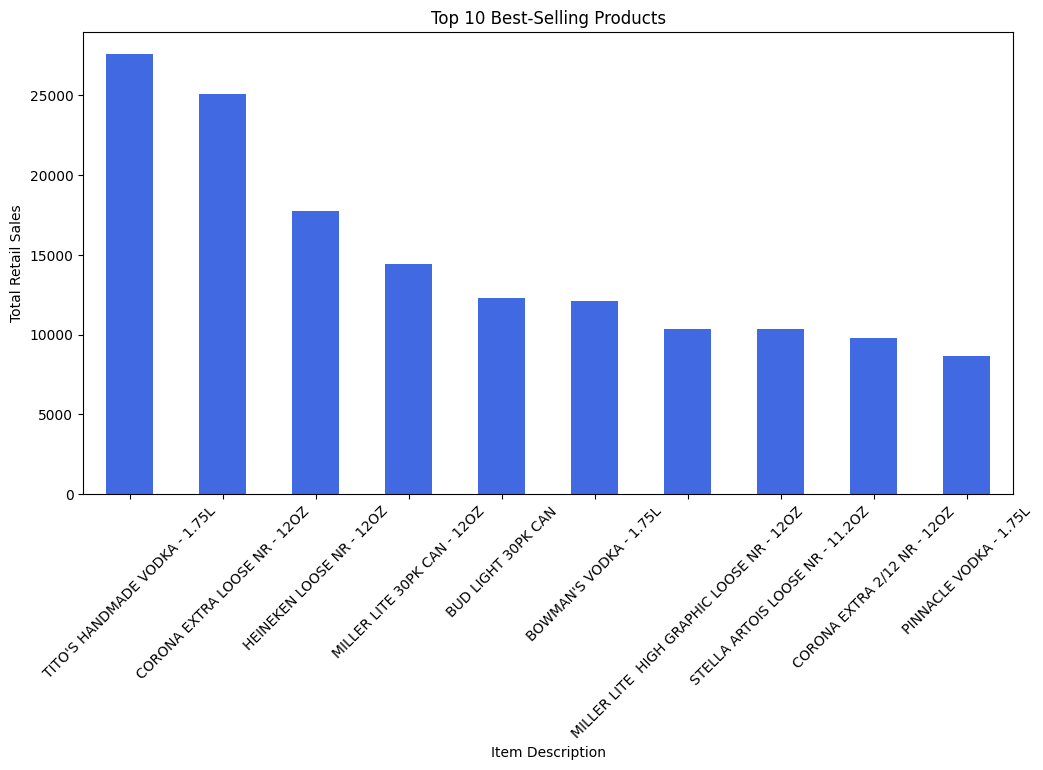

In [19]:
#### 5.3 Identifying Top-Selling Items

top_items = df.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().nlargest(10)
plt.figure(figsize=(12,6))
top_items.plot(kind='bar', color='royalblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Item Description')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.show()

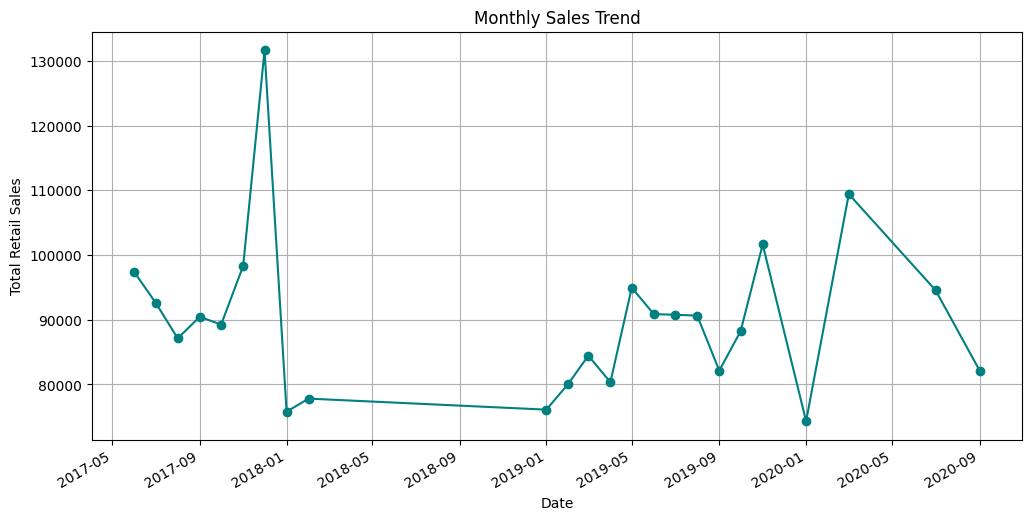

In [20]:
### Step 6: Sales Trend Analysis

#### 6.1 Aggregating Sales by Month

df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))
monthly_sales = df.groupby('DATE')['RETAIL SALES'].sum()


plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Retail Sales')
plt.grid()
plt.show()

In [21]:
### Step 7: Conclusion

# Summary of key findings:
# 1. Identified the top-selling products.
# 2. Analyzed missing data and handled inconsistencies.
# 3. Explored monthly sales trends to find peak performance periods.
# 4. Created visualizations to provide business insights.

# Next steps:
# - Further segmentation of product categories for in-depth analysis.
# - Investigate external factors affecting sales trends.
# - Develop predictive models to forecast future sales.

print("Analysis complete. Key insights derived from the dataset.")

Analysis complete. Key insights derived from the dataset.
